# Importando bibliotecas importantes

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

import keras
import numpy as np

In [2]:
%matplotlib notebook 
import matplotlib.pyplot as plt

In [3]:
from PIL import Image

### Bibliotecas pessoais

In [4]:
from dataHandler import dataHandler

# Carregando dados

In [5]:
data = dataHandler()
data.loadData("data/")

### Codificando labels via One Hot Encoding

In [6]:
data.oneHotEncode()

In [7]:
print("- Foram detectadas %d classes diferentes" % data.getClassCount())
print(data.classes)

- Foram detectadas 53 classes diferentes
['(' 'A' 'B' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' '_' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i'
 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


### Reformatação das features em caso de usar CNN

In [8]:
data.reshapeInputs()

### Obtendo dados
Os dados de treino e teste são divididos durante o carregamento

In [9]:
train_features, test_features = data.getFeatures()
train_labels, test_labels = data.getLabels()

### Visualizando dados

<IPython.core.display.Javascript object>


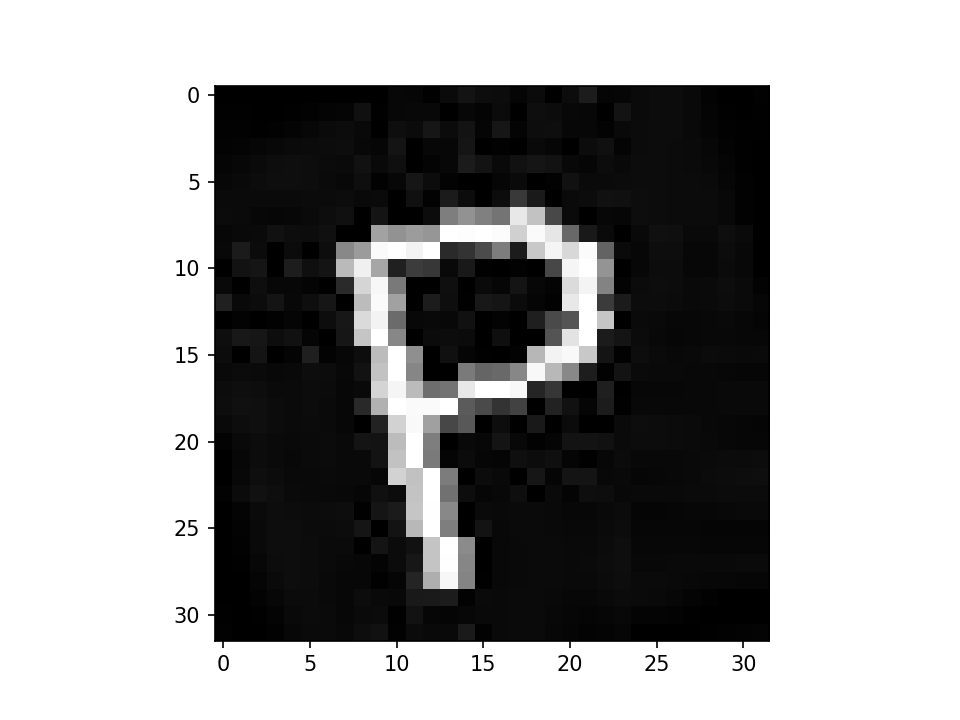

<IPython.core.display.Javascript object>


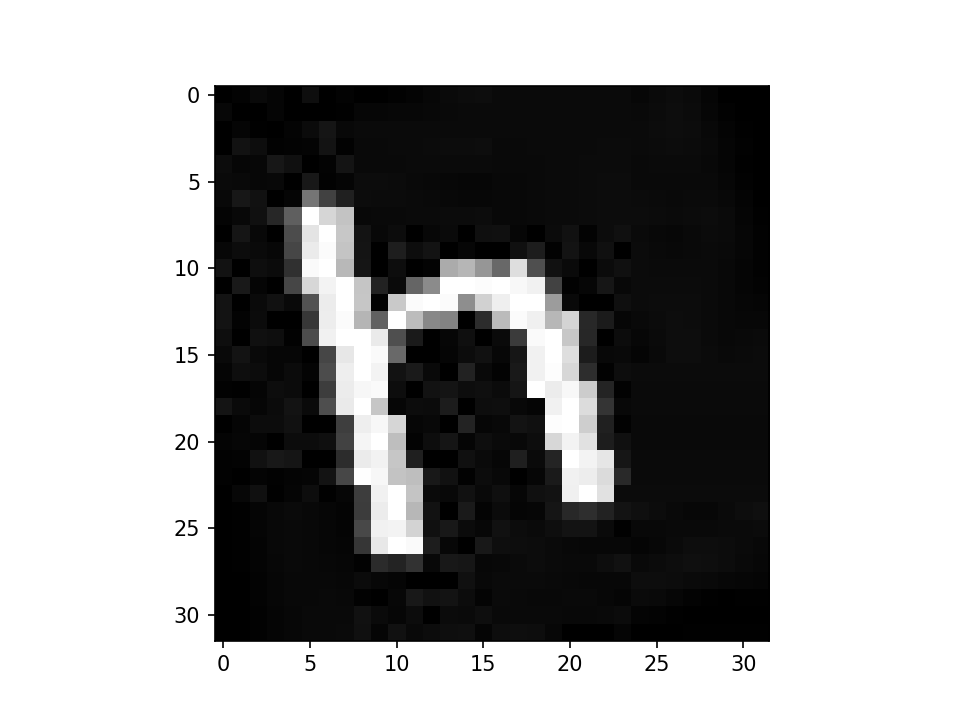

In [10]:
img1 = Image.fromarray(train_features[4].reshape(32,32))
img2 = Image.fromarray(train_features[5].reshape(32,32))

plt.figure()
plt.imshow(img1, cmap='gray')
plt.figure()
plt.imshow(img2, cmap='gray')

In [11]:
print(data.oneHotDecode(train_labels[4]))
print(data.oneHotDecode(train_labels[5]))

P
h


In [14]:
print("- Tamanho do conjunto de treino: %d" % len(train_features))
print("- Tamanho do conjunto de teste: %d" % len(test_features))

- Tamanho do conjunto de treino: 103350
- Tamanho do conjunto de teste: 31800


# Criando rede neural

In [17]:
inputShape = train_features[0].shape[0]
numClasses = data.getClassCount()

print("- Tamanho linear dos dados de entrada: %d" % inputShape)

- Tamanho linear dos dados de entrada: 32


### MLP

In [18]:
model = keras.Sequential()
model.add(keras.layers.Dense(700, input_dim=inputShape, activation='selu'))
model.add(keras.layers.Dropout(0.8))
model.add(keras.layers.normalization.BatchNormalization())

model.add(keras.layers.Dense(500, input_dim=inputShape, activation='selu'))
model.add(keras.layers.normalization.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(300, input_dim=inputShape, activation='selu'))
model.add(keras.layers.normalization.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(numClasses, activation="softmax"))

### CNN

In [19]:
model = keras.Sequential()
model.add(keras.layers.Lambda(lambda image: image * (1/255.0), input_shape = (inputShape,inputShape,1)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='selu'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='selu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='selu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(numClasses, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

## Compilando modelo

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Checkpoint

In [22]:
checkDir = "checkpoint/"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkDir,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Treinando modelo

In [21]:
history = model.fit(train_features, train_labels, epochs=10, batch_size=256,
                    validation_data=(test_features, test_labels), callbacks=[model_checkpoint_callback])

Epoch 1/200
404/404 [==============================] - 74s 133ms/step - loss: 2.3868 - accuracy: 0.3735 - val_loss: 0.6794 - val_accuracy: 0.7949
Epoch 2/200
404/404 [==============================] - 50s 125ms/step - loss: 0.8495 - accuracy: 0.7395 - val_loss: 0.5527 - val_accuracy: 0.8282
Epoch 3/200
404/404 [==============================] - 49s 122ms/step - loss: 0.6058 - accuracy: 0.8063 - val_loss: 0.4781 - val_accuracy: 0.8460
Epoch 4/200
404/404 [==============================] - 47s 117ms/step - loss: 0.4741 - accuracy: 0.8425 - val_loss: 0.4084 - val_accuracy: 0.8669
Epoch 5/200
404/404 [==============================] - 47s 117ms/step - loss: 0.4088 - accuracy: 0.8608 - val_loss: 0.3877 - val_accuracy: 0.8729
Epoch 6/200
404/404 [==============================] - 47s 117ms/step - loss: 0.3589 - accuracy: 0.8780 - val_loss: 0.4397 - val_accuracy: 0.8600
Epoch 7/200
404/404 [==============================] - 47s 117ms/step - loss: 0.3170 - accuracy: 0.8914 - val_loss: 0.4812 -

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


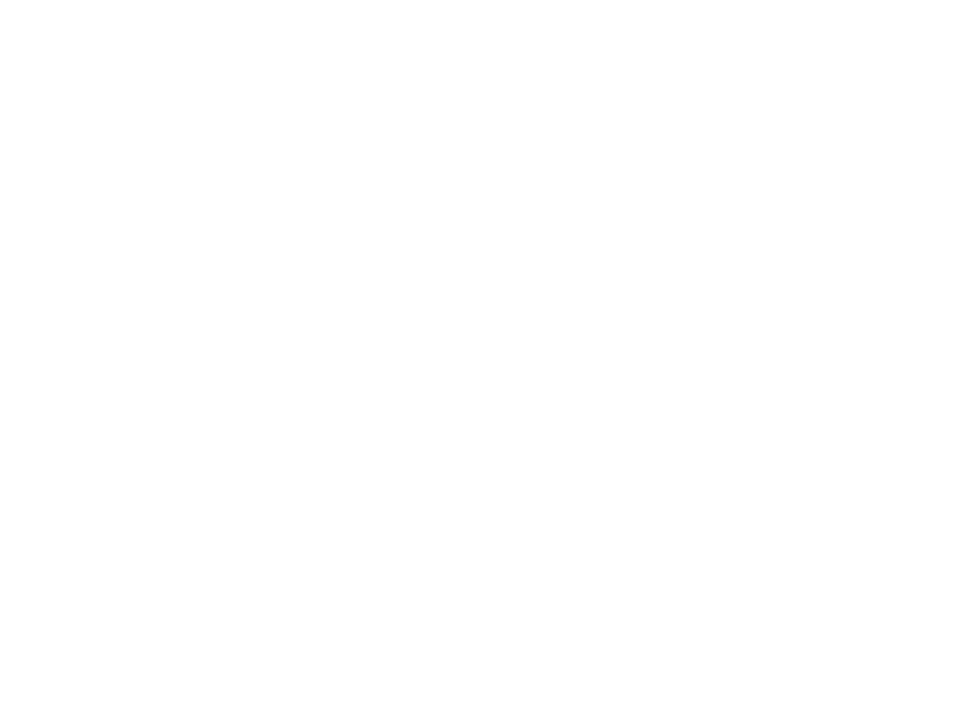

NameError: name 'history' is not defined

In [22]:
plt.figure()
plt.plot(history.history['accuracy'], label="Acurácia do treino")
plt.plot(history.history['val_accuracy'], label = "Acurácia do teste")
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label = "'Custo' do treino")
plt.plot(history.history['val_loss'], label= "'Custo' do teste")
plt.legend()
plt.show()

# Salvando modelo

In [23]:
modelDir = "model/"
model.save(modelDir)

with open(modelDir + "classes.txt",'r') as f:
    for c in data.classes:
        f.write()

INFO:tensorflow:Assets written to: model/assets


# Avaliando modelo

__Carrega o melhor peso__

In [23]:
model.load_weights(checkDir)

In [24]:
_, accuracy = model.evaluate(test_features, test_labels)
print("Acurácia do modelo nos dados de teste: %.2f%%" % (accuracy*100.0))

994/994 [==============================] - 5s 4ms/step - loss: 0.3650 - accuracy: 0.9131
Acurácia do modelo nos dados de teste: 91.22%


# Testando modelo

__MLP__

In [26]:
import cv2

# Função para carregar imagem
def loadImage(fileName, printImg = False):
    # Carrega a imagem e aplica um threshold para ficar igual
    # as imagens do treino
    img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 

    # Ajusta o tamanho da imagem
    img = cv2.resize(img, (32,32))
    
    if printImg:
        plt.figure()
        plt.imshow(img, cmap='gray')
    
    return list(img.flatten().tolist())


def getChar(x):
    label = model.predict([x], batch_size=1)
    
    char = data.oneHotDecode(label)
    
    return char

__CNN__

In [25]:
import cv2

# Função para carregar imagem
def loadImage(fileName, printImg = False):
    # Carrega a imagem e aplica um threshold para ficar igual
    # as imagens do treino
    img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

    # Ajusta o tamanho da imagem
    img = cv2.resize(img, (32,32))
    
    if printImg:
        plt.figure()
        plt.imshow(img, cmap='gray')
        
    img = img.reshape((1,32,32,1))
    
    return img


def getChar(x):
    label = model.predict(x, batch_size=1)
    
    char = data.oneHotDecode(label)
    
    return char

In [26]:
x = loadImage("testes/letraa.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi a


In [31]:
x = loadImage("testes/letraa3.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi a


In [44]:
x = loadImage("testes/letra.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi Z


In [28]:
x = loadImage("testes/letraAu.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi A


In [29]:
x = loadImage("testes/cidilha.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi E


In [30]:
x = loadImage("testes/cidilhau.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi G
